In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from farhad.AwesomeTextTools import text_into_sequence_of_integers
from farhad.AwesomeTextTools import Get_embeddings_from_Glove
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


---------------------------------------------------------
*** First def ***
text_into_sequence_of_integers

inputs: croups_df, dictunary, model="tfidf"
mode : ("binary" or "count" or "tfidf" or "freq")

outputs: 
         Embadding = text to integer
         Sequence; test to mode, mode=("binary" or "count" or "tfidf" or "freq")
---------------------------------------------------------
---------------------------------------------------------
*** second def ***
text_into_sequence_of_integers_with_glove_dictionary

inputs: croups_df,  model="tfidf"
mode : ("binary" or "count" or "tfidf" or "freq")

outputs: 
         Embadding = text to integer
         Sequence; test to mode, mode=("binary" or "count" or "tfidf" or "freq")
---------------------------------------------------------


In [2]:
df = pd.read_csv('data/tesla_label_twoprice_andtopic.csv')
df = df.dropna()
df.head(3)

,created_at,text,label_topicModels,Price_label,"Price_label(0,1)"
0,2011-01-18,watch slammed suv blowing red light mph miami ...,1,-1,0
1,2011-01-19,tesla xyecla,1,-1,0
2,2011-01-21,yep tesla going take world structurally unprofi,1,2,1


In [3]:
Embadding, sequence = text_into_sequence_of_integers(df['text'],df['text'], model='tfidf')
x_train, x_test, y_train, y_test = train_test_split(Embadding,df['Price_label(0,1)'], test_size=0.25, random_state=42)
print("Training entries: {}, labels: {}".format(len(x_train), len(y_train)))

Training entries: 421, labels: 421


In [43]:
import os 
glove_dir = 'data/RNN/'
glove_100k_50d = 'datastories.twitter.100d.txt'
glove_path = os.path.join(glove_dir, glove_100k_50d)

In [45]:
maxlen =100

embedding_matrix =  Get_embeddings_from_Glove(df['text'],max_words=maxlen,glove_path=glove_path )
len(embedding_matrix[3])

100

In [ ]:
seq = [x.split() for x in df['text']]
dic = []e
for x in seq:
    for i in x:
        dic.append(i)
dic = set(dic)

In [46]:

train_data = pad_sequences(x_train, padding='post', maxlen=maxlen)
test_data = pad_sequences(x_test, padding='post', maxlen=maxlen)

In [54]:
len(train_data)

421

# Model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, MaxPool1D, GlobalMaxPool1D, LSTM, RNN, Conv1D,Flatten
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from farhad_DL.utility import plot_confusion_matrix
from farhad_DL.utils import TimeSummary, plot_training_summary, Estimate_fasterD


from sklearn.metrics import confusion_matrix
from tensorflow.logging import set_verbosity, ERROR

In [61]:
# https://medium.com/@sabber/classifying-yelp-review-comments-using-cnn-lstm-and-pre-trained-glove-word-embeddings-part-3-53fcea9a17fa

In [55]:
def model_glove(embedding_matrix,maxlen, vocabulary_size=20000):
    
    model = Sequential()
    model.add(Embedding(vocabulary_size ,maxlen, weights=[embedding_matrix], input_length=maxlen))
    #model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Conv1D(64, 5, activation='relu'))
    model.add(MaxPool1D(pool_size=2))#MaxPooling1D(pool_size=2)
    
    model.add(LSTM(50))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    #model.add(Dropout(0.2))
    #model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])
    
    return model
    

In [60]:
set_verbosity(ERROR)
epochs = 200
monitor = EarlyStopping(monitor='vall_loss',min_delta=1e-3,verbose=0, mode='atuo')

time_summary = TimeSummary()
estimetor = Estimate_fasterD(epochs)


model = model_glove(embedding_matrix,len(train_data[0]))
history = model.fit(train_data,y_train, validation_data=(test_data,y_test),batch_size=40 ,verbose=0, epochs=epochs, callbacks=[monitor,time_summary,estimetor])

[199/200]

Training time: 0:10:31.457477(HH:MM:SS)
Epoch time avg: 0:00:03.157263(HH:MM:SS)


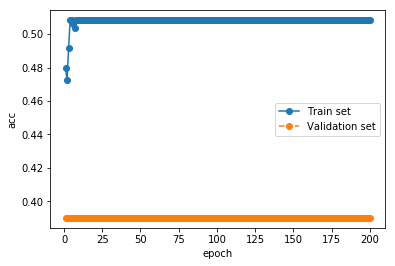

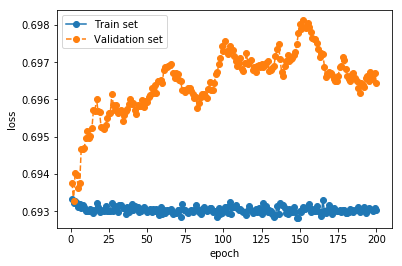

Accuracy: 39.01%


In [61]:
plot_training_summary(history,time_summary)
scores = model.evaluate(test_data, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [131]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 50, 50)            999950    
_________________________________________________________________
dropout_25 (Dropout)         (None, 50, 50)            0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 46, 64)            16064     
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 23, 64)            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 50)                23000     
_________________________________________________________________
dense_25 (Dense)             (None, 32)                1632      
_________________________________________________________________
dropout_26 (Dropout)         (None, 32)                0         
__________

In [34]:
glove_embds = model.layers[0].get_weights()[0]
glove_embds[0]

array([ 1.88579500e-01,  3.96706611e-01,  9.82837260e-01,  6.51208580e-01,
       -2.46653005e-01,  7.45384872e-01, -1.54535472e-01, -1.22548811e-01,
       -5.10579705e-01,  4.30535704e-01,  6.01680875e-01, -4.49572474e-01,
       -9.52361617e-03, -4.78234291e-01,  8.95856246e-02,  1.92149580e-01,
       -5.62345564e-01,  1.29003596e+00,  1.51061565e-02, -3.69300872e-01,
        5.54542542e-01, -3.06965530e-01, -7.41289020e-01, -9.56003517e-02,
       -8.39485601e-02,  6.23694446e-04, -3.66463006e-01,  9.33482647e-02,
       -3.34191881e-02, -3.55018198e-01, -3.93564284e-01, -2.70415425e-01,
       -2.17677042e-01, -7.19765425e-02,  2.67515928e-01, -1.12122081e-01,
       -7.26530999e-02,  1.38305724e-01,  3.24100256e-01,  2.49598533e-01,
        4.41444397e-01, -1.58401728e-02, -6.71361029e-01, -3.56848150e-01,
       -7.93598965e-02, -1.54908478e-01,  1.14794418e-01,  3.91537696e-01,
       -3.51995885e-01, -1.71987459e-01], dtype=float32)

In [18]:
import glove
import os
glove_dir = '/anaconda3/lib/python3.6/farhad/data/RNN/'
glove_100k_50d = 'glove.first-100k.6B.50d.txt'
glove_path = os.path.join(glove_dir, glove_100k_50d)
word_embedding = glove.Glove.load_stanford( glove_path )
word_embedding.word_vectors

array([[ 0.418   ,  0.24968 , -0.41242 , ..., -0.18411 , -0.11514 ,
        -0.78581 ],
       [ 0.013441,  0.23682 , -0.16899 , ..., -0.56657 ,  0.044691,
         0.30392 ],
       [ 0.15164 ,  0.30177 , -0.16763 , ..., -0.35652 ,  0.016413,
         0.10216 ],
       ...,
       [ 0.50534 , -1.8903  ,  0.092603, ...,  0.55925 ,  0.5294  ,
         1.0203  ],
       [ 0.99636 , -0.063851, -0.19626 , ...,  0.15664 , -0.59819 ,
        -0.3972  ],
       [ 0.41386 ,  1.0513  , -0.66827 , ...,  0.68643 , -0.15402 ,
        -1.1471  ]])

In [35]:
#word_embedding.inverse_dictionary

In [40]:
#from farhad.AwesomeTextTools import Visualize_Embedding_in_TensorBoard
#Visualize_Embedding_in_TensorBoard(glove_embds)

In [146]:
def jsut_for_embadding_model(vocab_size,max_length,embedding_matrix ):
    model = Sequential()
    model.add(Embedding(vocab_size, 50, input_length=max_length,weights=[embedding_matrix[1:]]))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    # compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    return model

[99/100]Training time: 0:00:46.313102(HH:MM:SS)
Epoch time avg: 0:00:00.463104(HH:MM:SS)


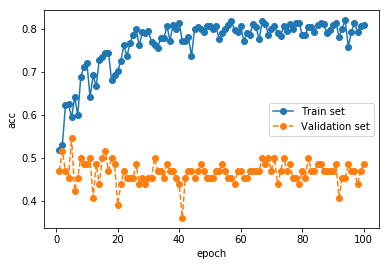

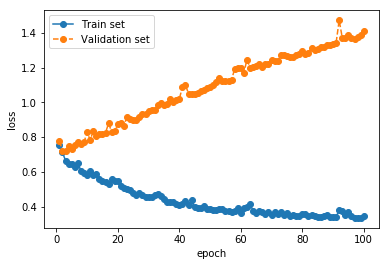

In [149]:

set_verbosity(ERROR)
epochs = 100
monitor = EarlyStopping(monitor='vall_loss',min_delta=1e-3,verbose=0, mode='atuo')

time_summary = TimeSummary()
estimetor = Estimate_fasterD(epochs)


model = jsut_for_embadding_model(vocab_size=19999,max_length=50, embedding_matrix=embedding_matrix)
history = model.fit(train_data,y_train, validation_split=0.15, verbose=0, epochs=epochs, callbacks=[monitor,time_summary,estimetor])
plot_training_summary(history,time_summary)
mode.summary

In [151]:
3
# Final evaluation of the model
scores = model.evaluate(test_data, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 39.01%


In [ ]:
Visualize_Embedding_in_TensorBoard(word_embedding)